In [ ]:
!pip install pymysql

     |████████████████████████████████| 51kB 3.0MB/s 


In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
co = pymysql.connect(host='3mdb.astro.unam.mx', user='OVN_user', passwd= 'oiii5007', db='3MdB_17')
res = pd.read_sql("""
SELECT 
log10(N__2_658345A/H__1_656281A) as N2, 
log10(O__3_500684A/H__1_486133A) as O3,
log10(BLND_372700A/H__1_486133A) as O2,
log10((NE_3_386876A + NE_3_396747A)/H__1_486133A) as Ne3,
log10(AR_3_713579A/H__1_486133A) as Ar3,
log10(HE_1_587564A/H__1_486133A) as He1,
log10(BLND_436300A/O__3_500684A) as rO3,
OXYGEN as O 
from tab_17
where ref = 'BOND_2' and Hbfrac > 0.8 """, 
con=co)
co.close()

In [ ]:
Table = res

In [ ]:
Table

,N2,O3,O2,Ne3,Ar3,He1,rO3,O
0,-2.987735,-0.453532,-1.029124,-1.487672,-2.368990,-1.016828,-1.573736,-5.4
1,-3.099837,-0.407860,-1.077828,-1.455701,-2.352631,-1.021487,-1.572343,-5.4
2,-3.202204,0.376873,-0.992681,-0.673078,-1.884810,-1.017745,-1.477737,-4.8
3,-0.123278,0.233510,0.386533,-0.721087,-1.207800,-0.979469,-1.988551,-4.0
4,-1.097684,0.365660,0.584045,-0.884406,-0.807009,-0.930318,-2.669623,-3.2
...,...,...,...,...,...,...,...,...
42117,-0.940844,-5.734957,-1.529916,-7.863042,-3.150767,-1.761577,-4.691507,-2.6
42118,-2.252078,-7.481761,-1.682038,-10.189831,-4.476845,-1.766705,-3.225415,-2.6
42119,-0.141363,-2.225892,-0.637258,-3.569587,-1.499450,-0.872822,-4.243326,-2.6
42120,-0.390428,-2.866517,-1.138111,-4.442270,-1.974704,-0.880060,-4.726250,-2.6


In [ ]:
df = pd.DataFrame(res)
df.to_csv('/content/drive/MyDrive/Josue/Maestria UNAM/Tercer semestre/ClasePython/Tabla_Examen2.csv')

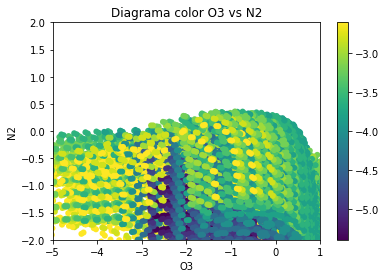

In [ ]:
plt.scatter(Table['O3'], Table['N2'], c=Table['O'], edgecolor='None' )
plt.colorbar()
plt.title('Diagrama color O3 vs N2');
plt.xlim(-5, 1);
plt.ylim(-2, 2);
plt.xlabel('O3');
plt.ylabel('N2');

In [ ]:
X_columns = ['N2', 
             'O3', 
             'O2', 
             'Ne3', 
             'Ar3', 
             'He1', 
             'rO3',
             'O'
 ]
y_columns = ['O']

In [ ]:
sdss_df = pd.DataFrame(Table, columns=X_columns)

In [ ]:
n = Table.shape
n

(42122, 8)

In [ ]:
Table

,N2,O3,O2,Ne3,Ar3,He1,rO3,O
0,-2.987735,-0.453532,-1.029124,-1.487672,-2.368990,-1.016828,-1.573736,-5.4
1,-3.099837,-0.407860,-1.077828,-1.455701,-2.352631,-1.021487,-1.572343,-5.4
2,-3.202204,0.376873,-0.992681,-0.673078,-1.884810,-1.017745,-1.477737,-4.8
3,-0.123278,0.233510,0.386533,-0.721087,-1.207800,-0.979469,-1.988551,-4.0
4,-1.097684,0.365660,0.584045,-0.884406,-0.807009,-0.930318,-2.669623,-3.2
...,...,...,...,...,...,...,...,...
42117,-0.940844,-5.734957,-1.529916,-7.863042,-3.150767,-1.761577,-4.691507,-2.6
42118,-2.252078,-7.481761,-1.682038,-10.189831,-4.476845,-1.766705,-3.225415,-2.6
42119,-0.141363,-2.225892,-0.637258,-3.569587,-1.499450,-0.872822,-4.243326,-2.6
42120,-0.390428,-2.866517,-1.138111,-4.442270,-1.974704,-0.880060,-4.726250,-2.6


In [ ]:
X_train = np.zeros(n, dtype = np.float32)
X_train[:,0] = data['N2'] #N2
#X_train[:,1] = data['O3'] #O3
#X_train[:,2] = data['O2'] #O2
#X_train[:,3] = data['Ne3'] #Ne3
#X_train[:,4] = data['Ar3'] #Ar3
#X_train[:,5] = data['He1'] #He1
#X_train[:,6] = data['rO3'] #rO3

Y_train = data['O']

In [ ]:
train = data.sample(frac=0.9, random_state=32) #random state is a seed value
test = data.drop(train.index)

X_train = train[X_columns]
y_train = train[y_columns]

X_test = test[X_columns]
y_test = test[y_columns]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

n_X = X_train.shape[1]

(37910, 8) (37910, 1) (4212, 8) (4212, 1)


In [ ]:
n_X

8

In [ ]:
X_train

,N2,O3,O2,Ne3,Ar3,He1,rO3,O
23788,-1.681357,0.778057,-0.239882,-0.472082,-0.934866,-0.950308,-2.360053,-3.4
14376,-1.277274,0.009077,-0.363205,-1.005909,-1.805859,-1.006017,-1.655953,-4.8
34454,-2.415655,-0.113448,0.049495,-1.048088,-1.652212,-1.017833,-1.783164,-4.6
33192,-0.828961,0.590776,0.277561,-0.461501,-1.105416,-0.991593,-1.896843,-4.0
37893,-1.624604,-0.275574,0.439682,-0.920133,-1.358995,-0.990275,-1.926616,-4.2
...,...,...,...,...,...,...,...,...
14732,-0.836645,-3.804420,-0.770377,-7.200496,-3.039333,-2.048326,-2.385579,-2.6
16115,-2.013645,-0.572268,-0.106000,-1.526889,-1.933693,-1.045314,-1.727967,-4.8
19244,-1.206823,-0.333736,0.393885,-1.664228,-1.495058,-1.115415,-1.893386,-4.2
40393,-0.644501,-5.041185,-1.535612,-7.108143,-2.936413,-1.636857,-4.586689,-2.8


In [ ]:
y_train

,O
23788,-3.4
14376,-4.8
34454,-4.6
33192,-4.0
37893,-4.2
...,...
14732,-2.6
16115,-4.8
19244,-4.2
40393,-2.8


In [ ]:
model = Sequential()

model.add(Dense(40, input_dim=n_X, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_48 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_49 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
3791/3791 [==============================] - 5s 1ms/step - loss: 0.9033 - mse: 0.9033
Epoch 2/50
3791/3791 [==============================] - 4s 1ms/step - loss: 3.4575e-04 - mse: 3.4575e-04
Epoch 3/50
3791/3791 [==============================] - 4s 1ms/step - loss: 2.2102e-04 - mse: 2.2102e-04
Epoch 4/50
3791/3791 [==============================] - 4s 1ms/step - loss: 2.1656e-04 - mse: 2.1656e-04
Epoch 5/50
3791/3791 [==============================] - 4s 1ms/step - loss: 8.5912e-05 - mse: 8.5912e-05
Epoch 6/50
3791/3791 [==============================] - 4s 1ms/step - loss: 8.6017e-05 - mse: 8.6017e-05
Epoch 7/50
3791/3791 [==============================] - 4s 1ms/step - loss: 7.1841e-05 - mse: 7.1841e-05
Epoch 8/50
3791/3791 [==============================] - 4s 1ms/step - loss: 8.1103e-05 - mse: 8.1103e-05
Epoch 9/50
3791/3791 [==============================] - 4s 1ms/step - loss: 1.2667e-04 - mse: 1.2667e-04
Epoch 10/50
3791/3791 [==============================] - 4s 1ms

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(4212, 1)

In [ ]:
X_test.shape

(4212, 8)

In [ ]:
y_pred

array([[-5.392506 ],
       [-2.5912232],
       [-5.3917465],
       ...,
       [-2.7925892],
       [-2.5854607],
       [-2.5959342]], dtype=float32)

In [ ]:
y_test

,O
0,-5.4
17,-2.6
19,-5.4
33,-4.8
51,-4.4
...,...
42053,-2.6
42073,-2.6
42074,-2.8
42075,-2.6


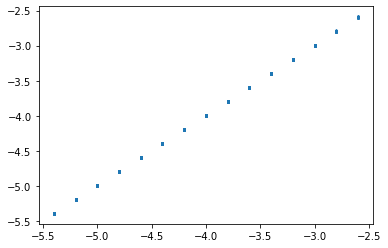

In [ ]:
f, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=1)

In [ ]:
print(np.std(y_test - y_pred))

O    0.003292
dtype: float64


In [ ]:
histt = y_test-y_pred

In [ ]:
histt

,O
0,-0.007494
17,-0.008777
19,-0.008253
33,-0.010331
51,-0.005554
...,...
42053,-0.002573
42073,-0.007118
42074,-0.007411
42075,-0.014539


In [ ]:
hist2 = np.std(histt)

In [ ]:
hist2

O    0.003292
dtype: float64

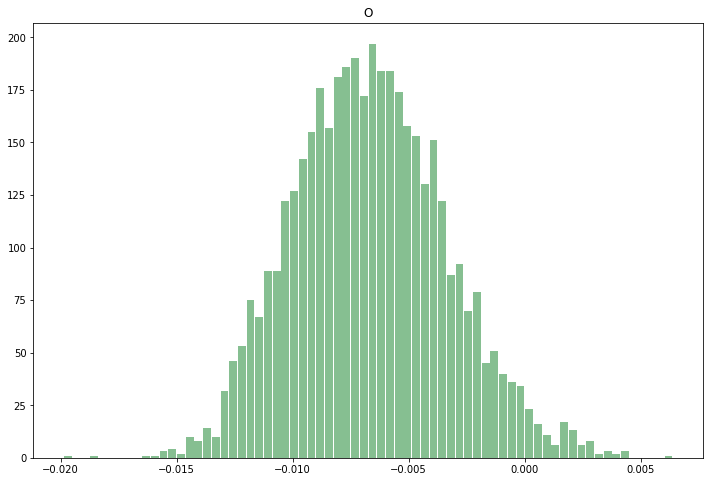

In [ ]:
ax = histt.hist( bins=70, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)